In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ds = tfds.load('diamonds', split='all')
assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/diamonds/1.0.0.incompleteTQTPH4/diamonds-train.tfrecord*...:   0%|        …

Dataset diamonds downloaded and prepared to /root/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'features': {'carat': TensorSpec(shape=(), dtype=tf.float32, name=None), 'clarity': TensorSpec(shape=(), dtype=tf.int64, name=None), 'color': TensorSpec(shape=(), dtype=tf.int64, name=None), 'cut': TensorSpec(shape=(), dtype=tf.int64, name=None), 'depth': TensorSpec(shape=(), dtype=tf.float32, name=None), 'table': TensorSpec(shape=(), dtype=tf.float32, name=None), 'x': TensorSpec(shape=(), dtype=tf.float32, name=None), 'y': TensorSpec(shape=(), dtype=tf.float32, name=None), 'z': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'price': TensorSpec(shape=(), dtype=tf.float32, name=None)}>


In [ ]:
data = tfds.as_dataframe(ds)
diamonds = pd.DataFrame(data)
diamonds

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0


Izbrisacemo prefiks "*features/*" 

In [ ]:
old_feature_names = diamonds.columns.to_list()
old_feature_names

['features/carat',
 'features/clarity',
 'features/color',
 'features/cut',
 'features/depth',
 'features/table',
 'features/x',
 'features/y',
 'features/z',
 'price']

In [ ]:
def rename_features(features):

  features.remove('price')
  new_features = []
  for f in features:
    new_features.append(f[9:])
  new_features.append('price')

  return new_features


In [ ]:
feature_names = rename_features(old_feature_names)
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'price']

In [ ]:
diamonds.columns = feature_names
diamonds.head()

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [ ]:
diamonds.describe()

,carat,clarity,color,cut,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.051020,2.594197,2.904097,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799805
std,0.474011,1.647136,1.701105,1.116600,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439697
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,3.000000,3.000000,3.000000,61.799999,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,4.000000,4.000000,4.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,7.000000,6.000000,4.000000,79.000000,95.000000,10.740000,58.900002,31.799999,18823.000000


Sacuvacemo kopiju dataseta

In [ ]:
diamondsOG = diamonds.copy(deep = True)

***

#### Nedostajuce vrednosti


In [ ]:
diamonds.isna().any()

carat      False
clarity    False
color      False
cut        False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

Kao sto vidimo, NaN vrednosti nema

***

#### Outlier-i

Koristicemo z-score za odredjivanje outliera i odbacivacemo sve koji imaju z-score > 3

Posto *price* necemo dirati, samo cemo posmatrati promenu broja outliera nakon otklanjanja outliera drugih atributa

In [ ]:
z_scores = stats.zscore(diamonds['price'])
outliers = diamonds['price'][abs(z_scores) > 3]
outliers

13       17383.0
99       18398.0
133      16587.0
183      18395.0
200      17294.0
          ...   
53729    16287.0
53801    18304.0
53849    18066.0
53897    17606.0
53898    18231.0
Name: price, Length: 1206, dtype: float32

otklanjanje

In [ ]:
z_scores = stats.zscore(diamonds['carat'])
outliers = diamonds['carat'][abs(z_scores) > 3]
outliers

200      2.35
503      2.36
884      2.61
1086     2.46
1114     3.01
         ... 
52829    2.46
52956    2.42
53082    2.31
53426    2.29
53801    2.30
Name: carat, Length: 439, dtype: float32

In [ ]:
diamonds.drop(outliers.index, inplace=True)

In [ ]:
diamonds.shape

(53501, 10)

In [ ]:
z_scores = stats.zscore(diamonds['depth'])
outliers = diamonds['depth'][abs(z_scores) > 3]
outliers

7        66.699997
524      69.800003
567      66.199997
704      66.900002
707      57.299999
           ...    
53344    57.299999
53377    68.000000
53452    68.199997
53764    56.299999
53799    66.400002
Name: depth, Length: 663, dtype: float32

In [ ]:
diamonds.drop(outliers.index, inplace=True)

In [ ]:
diamonds.shape

(52838, 10)

In [ ]:
z_scores = stats.zscore(diamonds['table'])
outliers = diamonds['table'][abs(z_scores) > 3]
outliers

96       64.0
106      64.0
303      65.0
664      64.0
996      64.0
         ... 
52874    65.0
53054    64.0
53077    67.0
53227    64.0
53826    64.0
Name: table, Length: 486, dtype: float32

In [ ]:
diamonds.drop(outliers.index, inplace=True)

In [ ]:
diamonds.shape

(52352, 10)

In [ ]:
z_scores = stats.zscore(diamonds['x'])
outliers = diamonds['x'][abs(z_scores) > 3]
outliers

1525     0.0
5723     0.0
12221    0.0
20729    0.0
33839    0.0
40575    0.0
Name: x, dtype: float32

In [ ]:
diamonds.drop(outliers.index, inplace=True)

In [ ]:
diamonds.shape

(52346, 10)

In [ ]:
z_scores = stats.zscore(diamonds['y'])
outliers = diamonds['y'][abs(z_scores) > 3]
outliers

12492    58.900002
52313    31.799999
Name: y, dtype: float32

In [ ]:
diamonds.drop(outliers.index, inplace=True)

In [ ]:
diamonds.shape

(52344, 10)

In [ ]:
z_scores = stats.zscore(diamonds['z'])
outliers = diamonds['z'][abs(z_scores) > 3]
outliers

241       0.000000
10070     6.160000
13988     0.000000
15852     0.000000
19003     1.070000
19224     0.000000
20500     0.000000
23126     1.410000
23223    31.799999
28987     0.000000
43837     0.000000
46365     0.000000
46737     0.000000
47540     0.000000
Name: z, dtype: float32

In [ ]:
diamonds.drop(outliers.index, inplace=True)

In [ ]:
diamonds.shape

(52330, 10)

In [ ]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0


Smanijili smo dimenziju sa 53 940  na 52 330 

In [ ]:
z_scores = stats.zscore(diamonds['price'])
outliers = diamonds['price'][abs(z_scores) > 3]
outliers

13       17383.0
99       18398.0
133      16587.0
183      18395.0
247      15760.0
          ...   
53735    15819.0
53805    15829.0
53849    18066.0
53897    17606.0
53898    18231.0
Name: price, Length: 1152, dtype: float32

Broj outliera se u ceni promenio sa 1206 na 1152 sto verovatno ukazuje na to da su "outlieri" cene samo dobra kombinacija visoko kvalitetnih ostalih atributa

***

#### Regression -> Classification

Posto regresioni problem svodimo na klasifikacioni, potrebno je kontinualni opseg atributa *price* podeliti na kategorije  
  
  Imacemo 4 kategorije po opsegu cena (u USD):

1. [0, 5000]
2. (5000, 10000]
3. (10000, 15000]
4. 15000+


In [ ]:
priceClasses = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
classColumn = []
d = diamonds['price']
for i in d:
  if i >= 0 and i <= 5000:
    classColumn.append(priceClasses[0])
  elif i <= 10000:
    classColumn.append(priceClasses[1])
  elif i <= 15000:
    classColumn.append(priceClasses[2])
  elif i > 15000:
    classColumn.append(priceClasses[3])

In [ ]:
s = pd.Series(classColumn)
diamonds.reset_index(inplace=True)
diamonds.drop('index', axis='columns', inplace=True)
diamonds['class'] = s
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price,class
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0,"(5000, 10000]"
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0,"[0, 5000]"
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0,"[0, 5000]"
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0,"(5000, 10000]"
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0,"[0, 5000]"
52326,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0,"[0, 5000]"
52327,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0,"[0, 5000]"
52328,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0,"[0, 5000]"


Kolona price nam vise nije od znacaja pa je mozemo odbaciti



In [ ]:
diamonds.drop(['price'], axis='columns', inplace = True)
diamonds.head()

,carat,clarity,color,cut,depth,table,x,y,z,class
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,"(5000, 10000]"
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,"[0, 5000]"
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,"[0, 5000]"
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,"(5000, 10000]"
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,"[0, 5000]"


***

#### Kodiranje kategorickih vrednosti

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52330 entries, 0 to 52329
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    52330 non-null  float32
 1   clarity  52330 non-null  int64  
 2   color    52330 non-null  int64  
 3   cut      52330 non-null  int64  
 4   depth    52330 non-null  float32
 5   table    52330 non-null  float32
 6   x        52330 non-null  float32
 7   y        52330 non-null  float32
 8   z        52330 non-null  float32
 9   class    52330 non-null  object 
dtypes: float32(6), int64(3), object(1)
memory usage: 2.8+ MB


Mozemo uociti da su atributi *clarity*, *cut* i *color* vec celobrojno kodirani pa nema potrebe obradjivati ove kolone

***

#### Feature engineering

Pored podataka *x*, *y*, *z* podaci od dimenzijama dijamanta su *depth* i *table*. S obzirom da se radi o dijamantima, oblik je veoma bitan.  
*Depth* nam daje neke podatke o obliku dijamanta ( 100 * z / mean(x, y) )  
*Table* nam daje podataka o odnosu gornje povrsine i najsireg dela dijamanta  

Pored ovih podataka, posluzila bi nam i informacija o zapremini dijamanta  
Posto je racunski zahtevno izracunati stvarnu zapreminu, a pri tom nemamo ni sve potrebne podatke, oko dijamanta cemo napraviti kvadar koji nam donekle opisuje prostor koji bi dijamant zauzimao i daje nam uvid u odnose *x*, *y* i *z*  
  
>Smesticemo ga u kolonu pod nazivom "**volume**" i vrednost racunamo kao proizvod *x, y, z*  
>Vrednost ce biti izrazena u mm3

In [ ]:
volumeColumn = []
xs = diamonds['x'].to_list()
ys = diamonds['y'].to_list()
zs = diamonds['z'].to_list()
for i in range(len(xs)):
  v = xs[i] * ys[i] * zs[i]
  volumeColumn.append(v)

len(volumeColumn)

52330

In [ ]:
diamonds['volume'] = volumeColumn
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,"(5000, 10000]",206.381695
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,"[0, 5000]",132.448481
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,"[0, 5000]",91.852998
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,"(5000, 10000]",244.225457
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,"[0, 5000]",54.409255
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,"[0, 5000]",164.401114
52326,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,"[0, 5000]",150.779702
52327,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,"[0, 5000]",49.969445
52328,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,"[0, 5000]",59.282040


***

#### Obrada vrednosti

Da bismo izbegli da neki brojevi budu znacajniji od drugih normalizovacemo odredjene atribute  
Ni jedna kolona osim nove kolone *volume* ne odskace nista preterano po brojevima od drugih ali cemo ipak normalizovati *depth, table, x, y, z i volume* za svaki slucaj

In [ ]:
scaler = MinMaxScaler()
columns_to_normalize = ['depth', 'table', 'x', 'y', 'z', 'volume']
data_to_normalize = diamonds[columns_to_normalize]

normalized_data = scaler.fit_transform(data_to_normalize)
diamonds[columns_to_normalize] = normalized_data
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


***

#### Balancing prediction classes

Uocili smo da nam je dataset neuravnotezen. Najzastupljenija klasa cini 70%, dok najmanje zastupljena cini svega 3%  
S obzirom da imamo preko 50 000 instanci u skupu, 70% cini 35 000 instanci. Koriscenje tehnike poput SMOTE-a (Synthetic Minority Oversampling Technique) bi nam dovelo dataset na preko 140 000 instanci sto bi veoma povecalo vreme treniranja modela.  
Takodje, s obzirom da klase "15000+" ima svega 3% a ona sadrzi najveci deo outliera i visoke cene, nesto sto bismo smatrali "ekstremnim vrednostima", oversamplovanje ovakve klase sa 1500 instanci na 35 000 bi rizikovalo ozbiljan **overfitting** pogotovo ako novogenerisane instance ne bi bile dobra reprezentacija inicijalne distribucije.  
  
S toga cemo koristiti tehniku **weighting** koja podrazumeva da kao argument nasem klasifikacionom modelu prosledimo tezinu klase kao merilo paznje koju ce joj posvetiti

Pogledacemo kako izgleda balansiranost klasa nakon obrade dataseta

In [ ]:
diamonds['class'].value_counts()

[0, 5000]         38324
(5000, 10000]      9283
(10000, 15000]     3372
15000+             1351
Name: class, dtype: int64

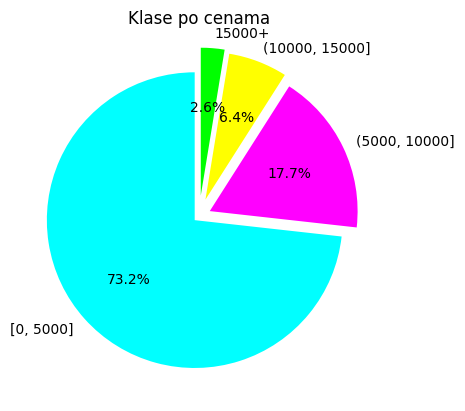

In [ ]:
pieData = diamonds['class'].value_counts().sort_values(ascending= False)
plt.pie(pieData, labels= priceClasses, colors=['cyan', 'magenta', 'yellow', 'lime'], autopct= '%.1f%%', startangle= 90, explode= [0.04, 0.08, 0.12, 0.14])
plt.title('Klase po cenama')
plt.show()

Mozemo primetiti da je udeo klasa sa najvisim cenama opao, sto i ima smisla ako uzmemo u obzir da smo odbacivali outliere

****

#### Exporting

In [ ]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0


In [ ]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [ ]:
diamondsOG.to_csv('diamonds_original.csv', index=False)
diamonds.to_csv('diamonds_preprocessed.csv', index=False)

***

Sada mozemo preci na **modelling**